# Setup Paths

In [11]:
import os

def setup_paths(dir_location, is_original_data):
    if dir_location.lower() == 'internal':
        base_path = r'C:\Senior_Design'
    elif dir_location.lower() == 'external':
        base_path = r'D:\Senior_Design'
    elif dir_location.lower() == 'cloud':
        base_path = r'C:\Users\dchen\OneDrive - University of Connecticut\Courses\Year 4\Fall 2024\BME 4900 and 4910W (Kumavor)\Python\Files'
    elif dir_location.lower() == 'refine':
        base_path = r'D:\Darren\Files'
    else:
        raise ValueError('Invalid directory location type')
    
    base_gt_path = os.path.join(base_path, 'database')
    if is_original_data:
        gt_path = os.path.join(base_gt_path, 'orignal_dataset', 'segmented', 'tiff')
    else:
        gt_path = os.path.join(base_gt_path, 'tablet_dataset', 'segmented', 'tiff')
    
    binary_path = gt_path.replace('segmented', 'binary')  
    if not os.path.isdir(binary_path):
        os.makedirs(binary_path)
    bordercore_path = gt_path.replace('segmented', 'bordercore')  
    if not os.path.isdir(bordercore_path):
        os.makedirs(bordercore_path)  
    instance_path = gt_path.replace('segmented', 'instance')
    if not os.path.isdir(instance_path):
        os.makedirs(instance_path)

    print('Paths set')
    return gt_path, binary_path, bordercore_path, instance_path

# Extract Pixel Values from Ground Truth TIFF Stack

In [12]:
import numpy as np
import tifffile as tiff
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

def extract_unique_pixel_values(folder_path):
    """Extract unique pixel values and their counts from a TIFF stack in a folder."""
    pixel_values = []
    
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            img = tiff.imread(os.path.join(folder_path, filename))
            pixel_values.append(img.flatten())  # Flatten to a 1D array
    
    # Concatenate all pixel values and get unique values with counts
    all_pixels = np.concatenate(pixel_values)
    unique_values, counts = np.unique(all_pixels, return_counts=True)
    
    return unique_values, counts  # Return both unique values and their frequencies

def highlight_pixel_value_one_image(folder_path, target_value):
    """Display an image where only a specific pixel value is shown, using the middle file in the folder."""
    tiff_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    
    if not tiff_files:
        raise FileNotFoundError("No TIFF files found in the folder.")
    
    # Select the middle file
    middle_file = tiff_files[len(tiff_files) // 2]
    img = tiff.imread(os.path.join(folder_path, middle_file))  # Load the middle file
    
    # Create a mask where only the target pixel value is highlighted
    highlighted_img = np.where(img == target_value, target_value, 0).astype(np.uint8)
    
    plt.imshow(highlighted_img, cmap="gray")
    plt.axis("off")
    plt.show()  # Display without saving

def load_tiff_stack_from_dir(directory):
    """Loads a stack of TIFF images from a directory into a 3D NumPy array."""
    tiff_files = sorted([f for f in os.listdir(directory) if f.lower().endswith('.tiff') or f.lower().endswith('.tif')])
    
    if not tiff_files:
        raise FileNotFoundError("No TIFF files found in the directory.")

    stack = [tiff.imread(os.path.join(directory, f)) for f in tiff_files]
    return np.stack(stack, axis=0)  # Stack images along the first dimension (depth)

def semantic_to_binary(input_path, output_path, target_value):
    tiff_stack = load_tiff_stack_from_dir(input_path)
    
    # Create a mask where only the target pixel value is highlighted
    binary_mask = np.where(tiff_stack == target_value, 255, 0).astype(np.uint8)
    
    for i in tqdm(range(binary_mask.shape[0]), desc=f"Processing {os.path.basename(input_path)}", unit="slice"):
        binary_path = os.path.join(output_path, f"slice_{i:04d}.tiff")
        tiff.imwrite(binary_path, binary_mask[i])
    

In [4]:
tiff_path = r'd:\Darren\Files\database\tablet_dataset\segmented\tiff\2_Tablet'
pixel_values, counts = extract_unique_pixel_values(tiff_path)
print(pixel_values)
print(counts)

[  0  63 127 191 255]
[163140812   3342014 208452414  14662261  31224949]


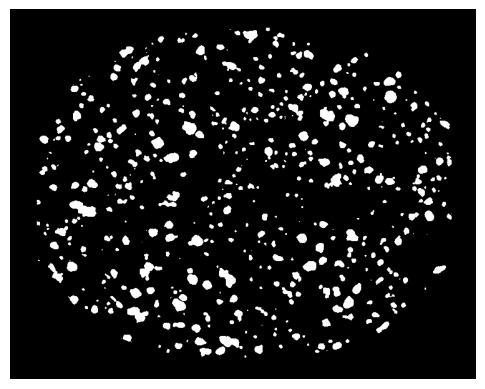

In [ ]:
tiff_path = r'd:\Darren\Files\database\tablet_dataset\segmented\tiff\2_Tablet'
highlight_pixel_value_one_image(tiff_path, target_value=255)

In [3]:
tiff_path = r'd:\Darren\Files\database\tablet_dataset\segmented\tiff\4_GenericD12'
pixel_values, counts = extract_unique_pixel_values(tiff_path)
print(pixel_values)
print(counts)

[  0  36  72 109 145 182 218 255]
[297255146    573119  24644694   1792716 117481723  41820600   1022409
  34351249]


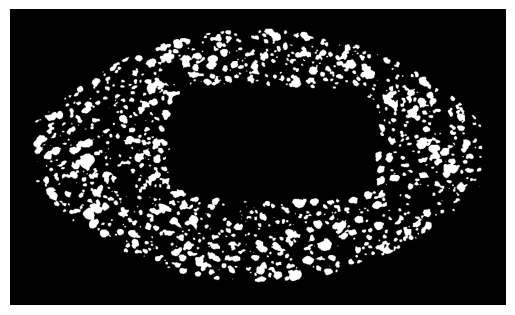

In [ ]:
tiff_path = r'd:\Darren\Files\database\tablet_dataset\segmented\tiff\4_GenericD12'
highlight_pixel_value_one_image(tiff_path, target_value=182)

In [ ]:
tiff_path = r'd:\Darren\Files\database\tablet_dataset\segmented\tiff\5_ClaritinD12'
pixel_values, counts = extract_unique_pixel_values(tiff_path)
print(pixel_values)
print(counts)

[  0  31  63  95 127 159 191 223 255]
[332670948    897899  29381435   7545660 139802390  42293472    920254
  41460996   1113794]


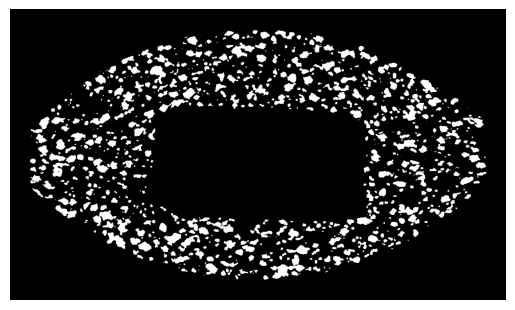

In [ ]:
tiff_path = r'd:\Darren\Files\database\tablet_dataset\segmented\tiff\5_ClaritinD12'
highlight_pixel_value_one_image(tiff_path, target_value=159)

In [ ]:
import os

dir_location = 'external'
gt_path, binary_path, _, _ = setup_paths(dir_location, False)
img_names = ['2_Tablet_Aug1', '2_Tablet_Aug2', '2_Tablet_Aug3', '2_Tablet_Aug4', '2_Tablet_Aug5',
               '4_GenericD12_Aug1', '4_GenericD12_Aug2', '4_GenericD12_Aug3', '4_GenericD12_Aug4', '4_GenericD12_Aug5',
               '5_ClaritinD12_Aug1', '5_ClaritinD12_Aug2', '5_ClaritinD12_Aug3', '5_ClaritinD12_Aug4', '5_ClaritinD12_Aug5']
target_values = [255, 255, 255, 255, 255,
                 182, 182, 182, 182, 182,
                 159, 159, 159, 159, 159]
for img_name, target_value in zip(img_names, target_values):
    input_path = os.path.join(gt_path, img_name)
    output_path = os.path.join(binary_path, img_name)
    if not os.path.isdir(output_path):
        os.makedirs(output_path)
    semantic_to_binary(input_path, output_path, target_value)

Paths set


Processing 5_ClaritinD12_Aug5: 100%|██████████| 1004/1004 [00:26<00:00, 38.25slice/s]


# Border Generation

In [ ]:
import os
import cv2
import numpy as np
import glob
from pathlib import Path
from tqdm import tqdm

def generate_border(image, border_size=2, n_erosions=1):
    """
    Generate border pixels from binary masks.
    """
    erosion_kernel = np.ones((3,3), np.uint8)
    eroded_image = cv2.erode(image, erosion_kernel, iterations=n_erosions)  
 
    kernel_size = 2 * border_size + 1 
    dilation_kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated  = cv2.dilate(eroded_image, dilation_kernel, iterations=1)
    
    dilated_127 = np.where(dilated == 255, 127, dilated)	
    original_with_border = np.where(eroded_image > 127, 255, dilated_127)
    
    return original_with_border

def process_tiff_stack_dir(input_dir: str, border_size=2, n_erosions=1):
    """
    Process all TIFF images in the given directory and save the results in a modified directory.
    """
    input_path = Path(input_dir)
    output_path = Path(input_dir.replace('binary', 'bordercore'))
    output_path.mkdir(exist_ok=True)
    
    tiff_files = sorted(input_path.glob("*.tiff"))
    if not tiff_files:
        raise ValueError("No TIFF files found in the directory.")
    
    for file in tqdm(tiff_files, desc="Processing TIFF files"):
        name = file.stem  # Extract name
        img = cv2.imread(str(file), cv2.IMREAD_GRAYSCALE)    
        processed_image = generate_border(img, border_size, n_erosions)
        cv2.imwrite(str(output_path / f"{name}.tiff"), processed_image)

In [23]:
dir_location = 'cloud'
_, binary_path, _, _ = setup_paths(dir_location, False)
img_names = ['2_Tablet_Aug1', '2_Tablet_Aug2', '2_Tablet_Aug3', '2_Tablet_Aug4', '2_Tablet_Aug5',
            '4_GenericD12_Aug1', '4_GenericD12_Aug2', '4_GenericD12_Aug3', '4_GenericD12_Aug4', '4_GenericD12_Aug5',
            '5_ClaritinD12_Aug1', '5_ClaritinD12_Aug2', '5_ClaritinD12_Aug3', '5_ClaritinD12_Aug4', '5_ClaritinD12_Aug5']

for img_name in img_names:
    input_path = os.path.join(binary_path, img_name)
    process_tiff_stack_dir(input_path, border_size=1)

Paths set


Processing TIFF files: 100%|██████████| 1004/1004 [00:24<00:00, 41.14it/s]


# Border to Instance

In [ ]:
import os
import numpy as np
import tifffile as tiff
import GeodisTK
import cc3d
import copy
import zarr
from scipy.ndimage import label as nd_label
from skimage.morphology import cube, footprint_rectangle, dilation
from scipy.ndimage.morphology import distance_transform_edt
from tqdm import tqdm
from acvl_utils.miscellaneous.ptqdm import ptqdm
import numpy_indexed as npi
from typing import Tuple, Optional, Type
from concurrent.futures import ProcessPoolExecutor, as_completed
from itertools import islice


def process_tiff_dir(input_dir, output_dir, processes=None):
    """
    Process all TIFF images in the input directory and save the results in the output directory.

    Args:
        input_dir (str): Path to the directory containing input TIFF images.
        output_dir (str): Path to the directory where processed TIFF images will be saved.
        processes (Optional[int]): Number of processes to use. Defaults to None (single process).
    """
    os.makedirs(output_dir, exist_ok=True)
    
    tiff_files = [f for f in os.listdir(input_dir) if f.endswith('.tiff') or f.endswith('.tif')]
    
    for file_name in tqdm(tiff_files, desc="Processing TIFF Images"):
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name)
        
        # Load TIFF image
        border_core = tiff.imread(input_path)
        
        # Process image
        instances, _ = border_core2instance(border_core, pred_border_core_tmp_filepath="temp.zarr", processes=processes)
        
        # Save output TIFF image
        tiff.imwrite(output_path, instances.astype(np.uint16))
        
    print(f"Processing complete. Output saved to {output_dir}")

def border_core2instance(border_core: np.ndarray, pred_border_core_tmp_filepath: str, processes: Optional[int] = None, progressbar: bool = True, dtype: Type = np.uint16) -> Tuple[np.ndarray, int]:
    """
    Convert the border-core segmentation of an entire image into an instance segmentation.
    """
    border_core_array = np.array(border_core)
    component_seg = cc3d.connected_components(border_core_array > 0).astype(dtype)
    instances = np.zeros_like(border_core, dtype=dtype)
    num_instances = 0
    props = {i: bbox for i, bbox in enumerate(cc3d.statistics(component_seg)["bounding_boxes"])}
    del props[0]
    component_seg = zarr.array(component_seg, chunks=(100, 100, 100))
    zarr.save(pred_border_core_tmp_filepath, component_seg)
    component_seg = zarr.open(pred_border_core_tmp_filepath, mode='r')
    
    if processes is None or processes == 0:
        for label, bbox in tqdm(props.items(), desc="Border-Core2Instance", disable=not progressbar):
            filter_mask = component_seg[bbox] == label
            border_core_patch = copy.deepcopy(border_core[bbox])
            border_core_patch[filter_mask != 1] = 0
            instances_patch = border_core_component2instance_dilation(border_core_patch).astype(dtype)
            instances_patch[instances_patch > 0] += num_instances
            num_instances = max(num_instances, np.max(instances_patch))
            patch_labels = np.unique(instances_patch)
            patch_labels = patch_labels[patch_labels > 0]
            for patch_label in patch_labels:
                instances[bbox][instances_patch == patch_label] = patch_label
    return instances, num_instances

def border_core_component2instance_dilation(patch: np.ndarray, core_label: int = 1, border_label: int = 2) -> np.ndarray:
    core_instances = np.zeros_like(patch, dtype=np.uint16)
    num_instances = nd_label(patch == core_label, output=core_instances)
    if num_instances == 0:
        return patch
    patch, core_instances, num_instances = remove_small_cores(patch, core_instances, core_label, border_label)
    core_instances = np.zeros_like(patch, dtype=np.uint16)
    num_instances = nd_label(patch == core_label, output=core_instances)
    if num_instances == 0:
        return patch
    instances = copy.deepcopy(core_instances)
    border = patch == border_label
    while np.sum(border) > 0:
        dilated = dilation(core_instances, footprint_rectangle([3,3,3]))
        dilated[patch == 0] = 0
        diff = (core_instances == 0) & (dilated != core_instances)
        instances[diff & border] = dilated[diff & border]
        border[diff] = 0
        core_instances = dilated
    return instances

def remove_small_cores(
    patch: np.ndarray, 
    core_instances: np.ndarray, 
    core_label: int, 
    border_label: int, 
    min_distance: float = 1, 
    min_ratio_threshold: float = 0.95, 
    max_distance: float = 3, 
    max_ratio_threshold: float = 0.0
) -> Tuple[np.ndarray, np.ndarray, int]:
    
    distances = distance_transform_edt(patch == core_label)
    core_ids = np.unique(core_instances)
    core_ids_to_remove = []
    for core_id in core_ids:
        core_distances = distances[core_instances == core_id]
        num_min_distances = np.count_nonzero(core_distances <= min_distance)
        num_max_distances = np.count_nonzero(core_distances >= max_distance)
        num_core_voxels = np.count_nonzero(core_instances == core_id)
        min_ratio = num_min_distances / num_core_voxels
        max_ratio = num_max_distances / num_core_voxels
        if (min_ratio_threshold is None or min_ratio >= min_ratio_threshold) and (max_ratio_threshold is None or max_ratio <= max_ratio_threshold):
            core_ids_to_remove.append(core_id)
    num_cores = len(core_ids) - len(core_ids_to_remove)
    if len(core_ids_to_remove) > 0:
        target_values = np.zeros_like(core_ids_to_remove, dtype=int)
        shape = patch.shape
        core_instances = npi.remap(core_instances.flatten(), core_ids_to_remove, target_values).reshape(shape)
        patch[(patch == core_label) & (core_instances == 0)] = border_label
    return patch, core_instances, num_cores

# Example usage:
# process_tiff_dir("path/to/input", "path/to/output", processes=4)
